##**SUPERMARKET SALES PREDICTION**

**NAME: SUJITH V**

**DATE:**
28/10/2024

#**CONTENTS**



1.   PROJECT BACKGROUND
2.   OBJECTIVE

1.   DATA PREPROCESSING

1.   ENCODING
2.   EXPLORATORY DATA ANALYSIS


6.   MODELS
7.   OVERFITTING

1.   CONCLUTION








##**PROJECT BACKGROUND**

Supermarkets face the challenge of managing inventory efficiently while maximizing sales. Accurate sales predictions can help in minimizing stockouts and overstock situations, optimizing supply chain operations, and tailoring marketing strategies to boost customer engagement. The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company.

##**OBJECTIVE**

The primary objective of this project is to develop a predictive model that accurately forecasts weekly sales for various products in a supermarket. This will aid in strategic decision-making, inventory management, and enhancing customer satisfaction.

##**DATA PREPROCESSING**

**IMPORTING LIBRARIES**

1. **Pandas**
Purpose: A powerful data manipulation and analysis library for Python. It provides data structures like DataFrames and Series, making it easy to work with structured data.
Common Use Cases: Loading datasets, cleaning data, filtering, aggregating, and transforming data.
2. **Seaborn**
Purpose: A statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
Common Use Cases: Creating complex visualizations easily (e.g., heatmaps, box plots, violin plots) with beautiful default styles.
3. **Matplotlib.pyplot**
Purpose: A collection of functions that make Matplotlib work like MATLAB. It is widely used for creating static, animated, and interactive visualizations in Python.
Common Use Cases: Plotting graphs (line plots, scatter plots, histograms) and customizing visualizations.
4. **Sklearn.preprocessing**
Purpose: Part of the Scikit-learn library, this module contains tools for scaling and transforming data before modeling.
Common Use Cases: Standardizing features (StandardScaler), normalizing features (MinMaxScaler), and encoding categorical variables.
5. **Numpy**
Purpose: A fundamental package for numerical computing in Python. It provides support for arrays, matrices, and a wide range of mathematical functions.
Common Use Cases: Performing mathematical operations on large datasets, handling arrays and matrices efficiently.
6. **Os**
Purpose: A standard library in Python that provides functions to interact with the operating system. It allows you to manipulate file paths and environment variables.
Common Use Cases: Managing file and directory paths, checking for file existence, and navigating the file system.
7. **Scipy**
Purpose: A library for scientific and technical computing. It builds on NumPy and provides additional functionality, including optimization, integration, interpolation, and statistics.
Common Use Cases: Performing statistical tests, numerical optimization, and working with special functions.
8. **Warnings**
Purpose: A built-in Python library for issuing warning messages. It allows you to control whether warnings are ignored, displayed, or turned into errors.
Common Use Cases: Suppressing warnings during execution to keep output clean.
9. **Datetime**
Purpose: A built-in module for manipulating dates and times. It provides classes for working with dates, times, and time intervals.
Common Use Cases: Formatting dates, calculating differences between dates, and working with time zones.
10. **%matplotlib inline**
Purpose: A magic command specific to Jupyter notebooks that allows Matplotlib plots to be displayed inline, directly in the notebook.
Common Use Cases: Making it easier to visualize plots within a Jupyter notebook environment.

11. **Scipy.stats**
Purpose: A module in the SciPy library that contains a large number of statistical functions, including probability distributions and statistical tests.
Common Use Cases: Performing statistical tests (e.g., t-tests, chi-square tests) and generating random samples from various distributions.
12. **Sklearn.model_selection**
Purpose: Part of Scikit-learn that provides functions to split datasets into training and testing sets, as well as tools for cross-validation.
Common Use Cases: Dividing data into training and test sets to evaluate model performance.
13. **Tensorflow**
Purpose: An open-source library for deep learning and machine learning developed by Google. It provides a comprehensive ecosystem for building and deploying ML models.
Common Use Cases: Building neural networks, training models, and performing inference on new data.
14. **Tensorflow.keras**
Purpose: The high-level API of TensorFlow for building and training deep learning models. It provides user-friendly methods for defining neural networks.
Common Use Cases: Creating, compiling, and training deep learning models.
15. **Statsmodels**
Purpose: A library for estimating and testing statistical models. It provides tools for performing various statistical tests, regression analysis, and time series analysis.
Common Use Cases: Performing linear regression, generalized linear models, and hypothesis testing.
16. **Train_test_split:** This function is used to split your dataset into two subsets: one for training the model and another for testing it. This helps evaluate how well the model performs on unseen data.

17. **KNeighborsClassifier:** This is a machine learning algorithm that classifies data points based on their proximity to other points in the feature space. It uses the K-nearest neighbors algorithm, which classifies a sample based on the majority class among its K nearest neighbors.

18. **Accuracy_score:** This function calculates the accuracy of the model, which is the ratio of correctly predicted instances to the total instances.

19. **Classification_report:** This provides a detailed report on the precision, recall, f1-score, and support for each class in a classification problem.

20. **Confusion_matrix:** This function generates a matrix that describes the performance of the classification model. It shows the counts of true positive, true negative, false positive, and false negative predictions.

21. **SVC**: This stands for Support Vector Classifier, which is another classification algorithm. SVC aims to find the hyperplane that best separates different classes in the feature space.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

**LOADING THE DATASET**

This dataset is well-structured for analysis, containing various attributes related to supermarket sales. It includes both categorical and numerical variables, making it suitable for various analyses, such as sales performance, customer demographics, and product profitability. We can use this data for exploratory data analysis (EDA), predictive modeling, and visualization to gain insights into sales trends and customer behavior.

[DATA](https://drive.google.com/file/d/12CXX-JSDeC-9tQ44MiR4lSl3ooj5nsOx/view?usp=drive_link)

In [ ]:

df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [ ]:
df


Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

Clean and transform data to ensure quality and usability

**GET INFORMATION ABOUT THE DATAFRAME**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**The code print(df.info())** is a command in Python, specifically using the Pandas library, to display a summary of the DataFrame df. Here's a breakdown of what this code does and what you can expect from its output:

**Explanation of the Code
df:** This represents a Pandas DataFrame object. It's assumed that you have already created or loaded this DataFrame in your code.

**.info():** This is a method provided by Pandas that outputs a concise summary of the DataFrame, including:

**The number of entries (rows).**



**The number of columns**.




**The column names and their data types.**



**The count of non-null values in each column.**




**The memory usage of the DataFrame.**





**print():** This function is used to output the result of df.info() to the console or terminal. While df.info() outputs its summary directly, wrapping it in print() is not necessary since info() already prints the summary. However, it can be used in contexts where you want to ensure output formatting.

In [ ]:
df.shape


(1000, 17)

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**CHECKING NULL VALUE**





In [ ]:
df.isnull().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

No null values contain

**CHECKING DUPLICATE VALUE**

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.value_counts()

Invoice ID   Branch  City       Customer type  Gender  Product line         Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
101-17-6199  A       Yangon     Normal         Male    Food and beverages   45.79       7         16.0265  336.5565  3/13/2019  19:44  Credit card  320.53  4.761905                 16.0265       7.0       1
641-62-7288  B       Mandalay   Normal         Male    Home and lifestyle   99.92       6         29.9760  629.4960  3/24/2019  13:33  Ewallet      599.52  4.761905                 29.9760       7.1       1
633-91-1052  A       Yangon     Normal         Female  Home and lifestyle   12.03       2         1.2030   25.2630   1/27/2019  15:51  Cash         24.06   4.761905                 1.2030        5.1       1
634-97-8956  A       Yangon     Normal         Male    Food and beverages   32.90       3         4.9350   103.6350  2/17/2019  17:27  Credit card  98.70   4.761905                 4.9350        9.1       1
635-28-5728  A       Yangon     Normal         Male    Health and beauty    56.00       3         8.4000   176.4000  2/28/2019  19:33  Ewallet      168.00  4.761905                 8.4000        4.8       1
                                                                                                                                                                                                            ..
373-14-0504  A       Yangon     Member         Female  Sports and travel    71.63       2         7.1630   150.4230  2/12/2019  14:33  Ewallet      143.26  4.761905                 7.1630        8.8       1
373-73-7910  A       Yangon     Normal         Male    Sports and travel    86.31       7         30.2085  634.3785  2/8/2019   10:37  Ewallet      604.17  4.761905                 30.2085       5.3       1
373-88-1424  C       Naypyitaw  Member         Male    Home and lifestyle   35.81       5         8.9525   188.0025  2/6/2019   18:44  Ewallet      179.05  4.761905                 8.9525        7.9       1
374-17-3652  B       Mandalay   Member         Female  Food and beverages   42.82       9         19.2690  404.6490  2/5/2019   15:26  Credit card  385.38  4.761905                 19.2690       8.9       1
898-04-2717  A       Yangon     Normal         Male    Fashion accessories  76.40       9         34.3800  721.9800  3/19/2019  15:49  Ewallet      687.60  4.761905                 34.3800       7.5       1
Name: count, Length: 1000, dtype: int64

**df.value_counts()** This method used to count the occurrences of unique values in a DataFrame column .

In [ ]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

**ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Encode each categorical column
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])

# Display the encoded dataset
df

Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
995         153       2     1              1       1             3   
996         250       1     0              1       0             4   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity   Tax 5%      Total  Date  Time  Payment    cogs  \
0         74.69         7  26.1415   548.9715    26   146        2  522.83   
1         15.28         5   3.8200    80.2200    87    23        0   76.40   
2         46.33         7  16.2155   340.5255    81   155        1  324.31   
3         58.22         8  23.2880   489.0480    19   485        2  465.76   
4         86.31         7  30.2085   634.3785    57    29        2  604.17   
..          ...       ...      ...        ...   ...   ...      ...     ...   
995       40.35         1   2.0175    42.3675    21   174        2   40.35   
996       97.38        10  48.6900  1022.4900    70   342        2  973.80   
997       31.84         1   1.5920    33.4320    58   154        0   31.84   
998       65.82         1   3.2910    69.1110    45   261        0   65.82   
999       88.34         7  30.9190   649.2990    40   160        0  618.38   

     gross margin percentage  gross income  Rating  
0                   4.761905       26.1415     9.1  
1                   4.761905        3.8200     9.6  
2                   4.761905       16.2155     7.4  
3                   4.761905       23.2880     8.4  
4                   4.761905       30.2085     5.3  
..                       ...           ...     ...  
995                 4.761905        2.0175     6.2  
996                 4.761905       48.6900     4.4  
997                 4.761905        1.5920     7.7  
998                 4.761905        3.2910     4.1  
999                 4.761905       30.9190     6.6  

[1000 rows x 17 columns]

In [ ]:
#lets find the categorialfeatures
list_1=list(df.columns)

In [ ]:
list_1

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

 It is a simple yet effective way to create a list of the DataFrame's column names, making it easier to work with those names in further data processing or analysis tasks.

In [ ]:
df.shape

(1000, 17)

**OUTLIERS**

In [ ]:
print(df.describe())


        Invoice ID       Branch         City  Customer type       Gender  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean    499.500000     0.988000     1.008000       0.499000     0.499000   
std     288.819436     0.817633     0.820127       0.500249     0.500249   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     249.750000     0.000000     0.000000       0.000000     0.000000   
50%     499.500000     1.000000     1.000000       0.000000     0.000000   
75%     749.250000     2.000000     2.000000       1.000000     1.000000   
max     999.000000     2.000000     2.000000       1.000000     1.000000   

       Product line   Unit price     Quantity       Tax 5%        Total  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean       2.452000    55.672130     5.510000    15.379369   322.966749   
std        1.715412    26.494628     2.923431    11.708825   245.885335   
min        0.00

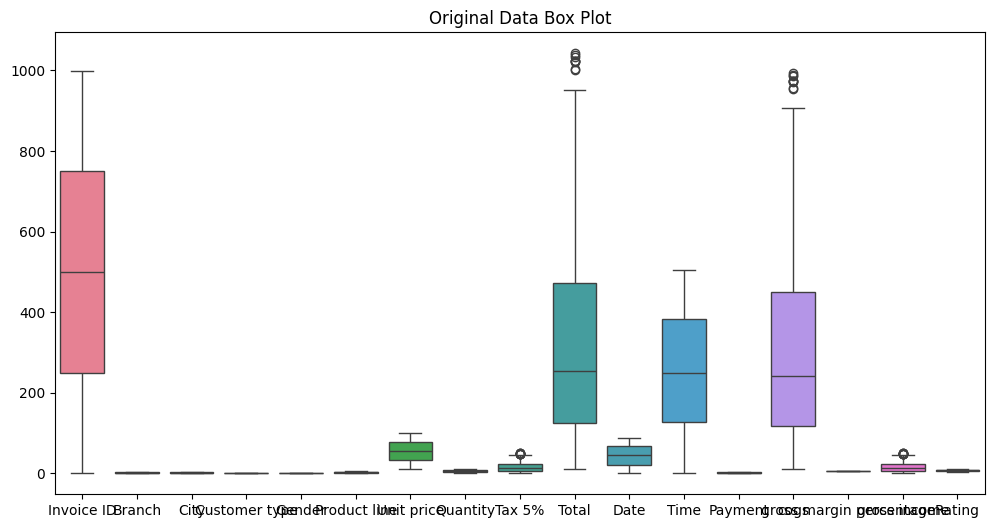

In [ ]:
# Box plot for original data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int']))
plt.title('Original Data Box Plot')
plt.show()

**USING IQR**

The provided code snippet uses the Interquartile Range (IQR) method to identify and remove outliers from a Pandas DataFrame (df).

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR      #Lower Bound: Any data point below this value is considered a potential outlier.
upper_bound = Q3 + 1.5 * IQR      #Upper Bound: Any data point above this value is also considered a potential outlier.
                                  #The factor of 1.5 is a common choice for determining outliers.

# Identify outliers
outlier_condition = (df < lower_bound) | (df > upper_bound)
outliers = df[outlier_condition.any(axis=1)]  # Store outliers
df1= df[~outlier_condition.any(axis=1)]  # Cleaned data


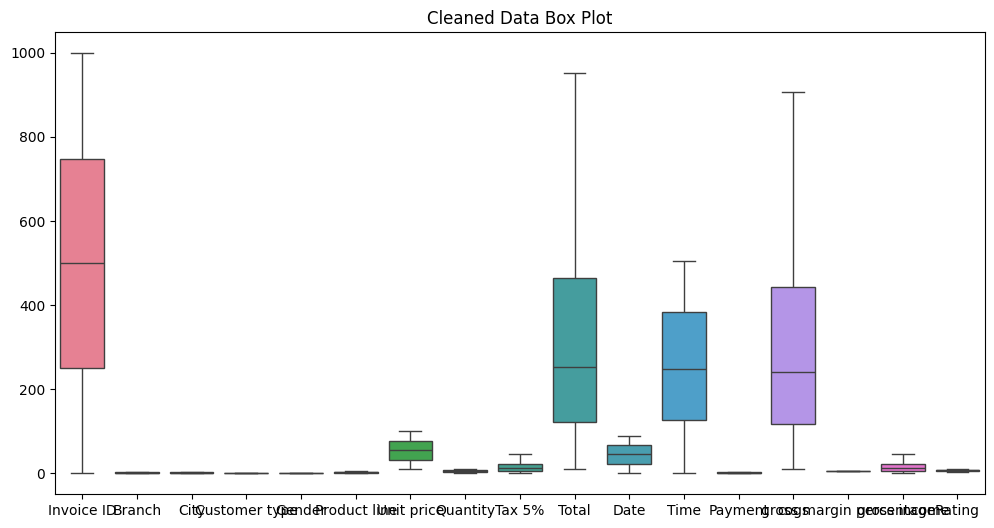

In [ ]:
# Box plot for cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1.select_dtypes(include=['float64', 'int']))
plt.title('Cleaned Data Box Plot')
plt.show()


In [ ]:
# Display outliers
print("Removed Outliers:")
print(outliers)


Removed Outliers:
     Invoice ID  Branch  City  Customer type  Gender  Product line  \
166         156       2     1              1       1             4   
167         721       0     2              1       1             1   
350         949       2     1              0       0             1   
357         549       2     1              1       0             5   
422         205       2     1              0       0             1   
557         223       2     1              0       0             2   
699         816       2     1              1       1             4   
792         800       1     0              1       0             4   
996         250       1     0              1       0             4   

     Unit price  Quantity  Tax 5%     Total  Date  Time  Payment   cogs  \
166       95.58        10  47.790  1003.590     7   163        0  955.8   
167       98.98        10  49.490  1039.290    57   297        1  989.8   
350       99.30        10  49.650  1042.650    37   227 

In [ ]:
# Shape comparison
print("Original data shape:", df.shape)
print("Cleaned data shape:", df1.shape)


Original data shape: (1000, 17)
Cleaned data shape: (991, 17)


**SKEWNESS**

In [ ]:
# Calculate skewness
skewness = df1.select_dtypes(include=['float64', 'int']).skew()
print("Skewness of each numeric column:")
print(skewness)


Skewness of each numeric column:
Invoice ID                -0.000612
Branch                     0.031573
City                      -0.016812
Customer type              0.010106
Gender                    -0.002021
Product line               0.062044
Unit price                 0.014036
Quantity                   0.021873
Tax 5%                     0.843948
Total                      0.843948
Date                      -0.028419
Time                       0.000294
Payment                    0.000000
cogs                       0.843948
gross margin percentage    0.000000
gross income               0.843948
Rating                     0.005938
dtype: float64


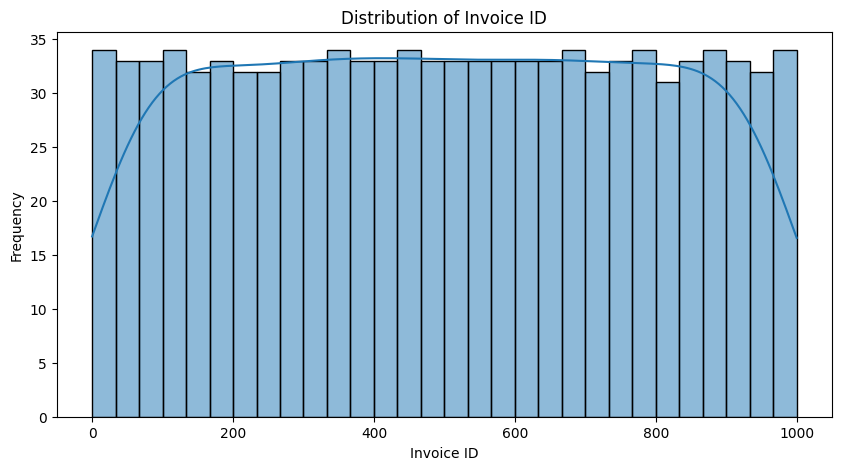

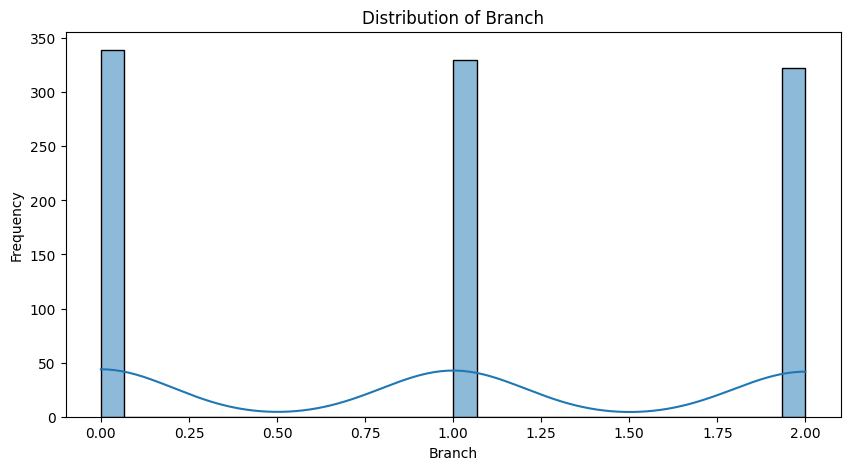

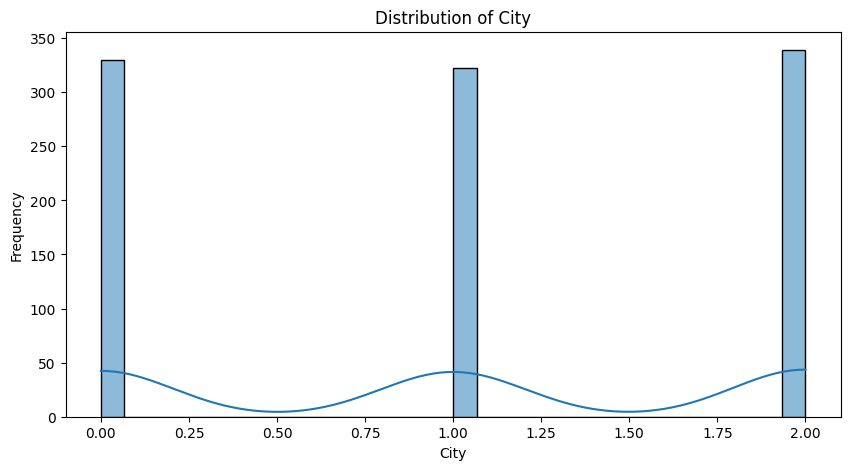

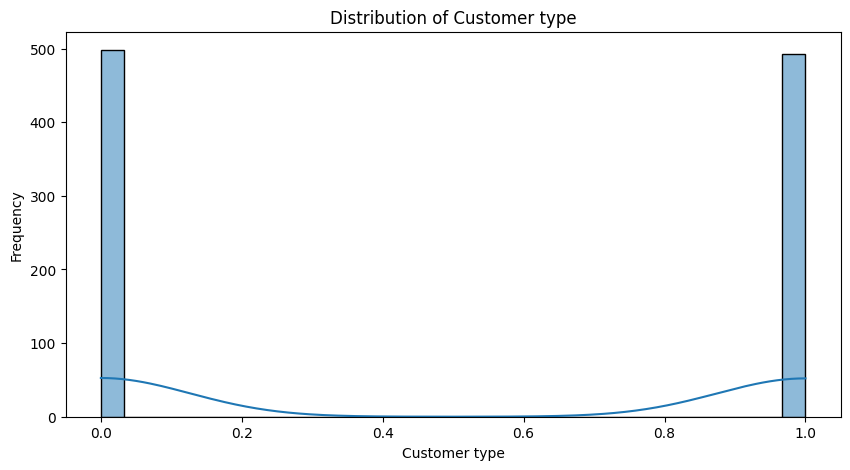

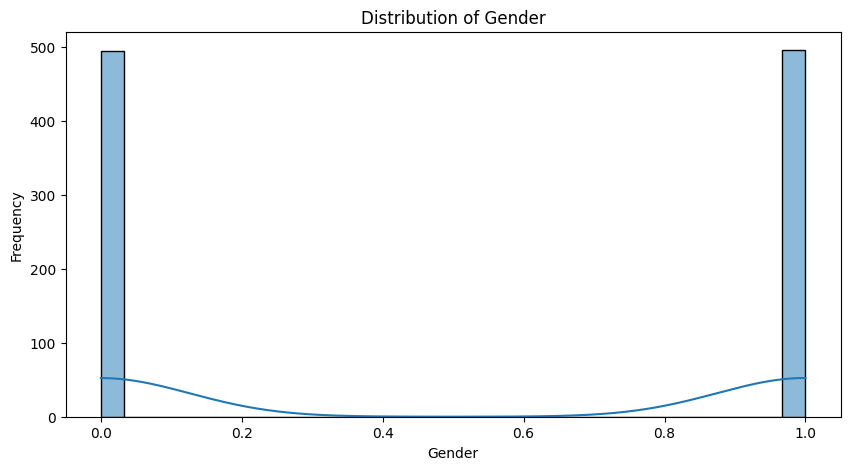

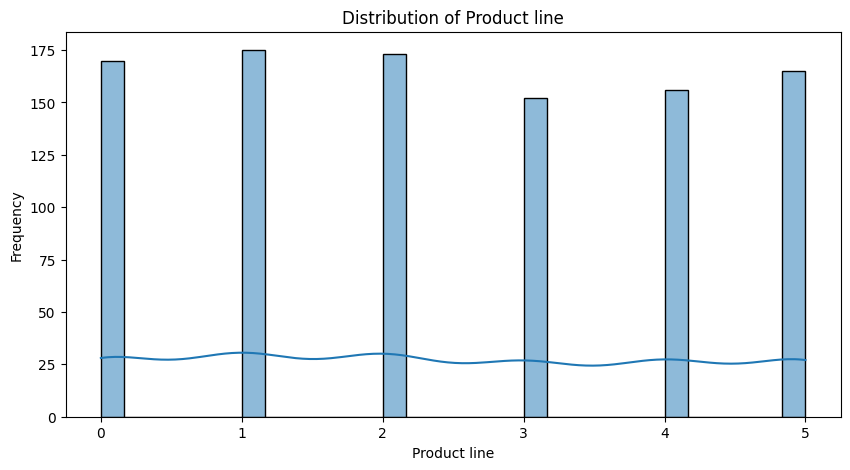

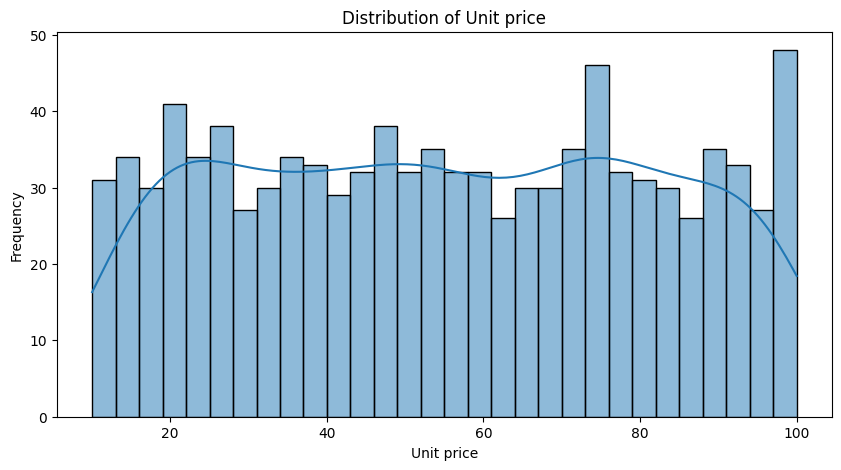

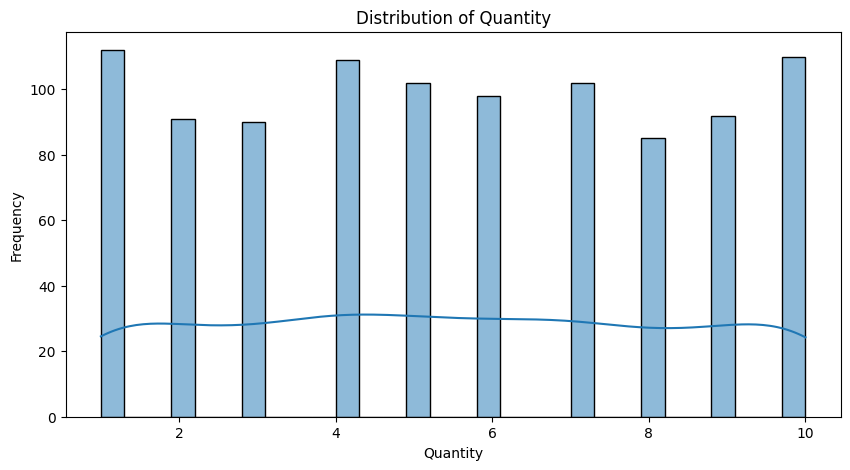

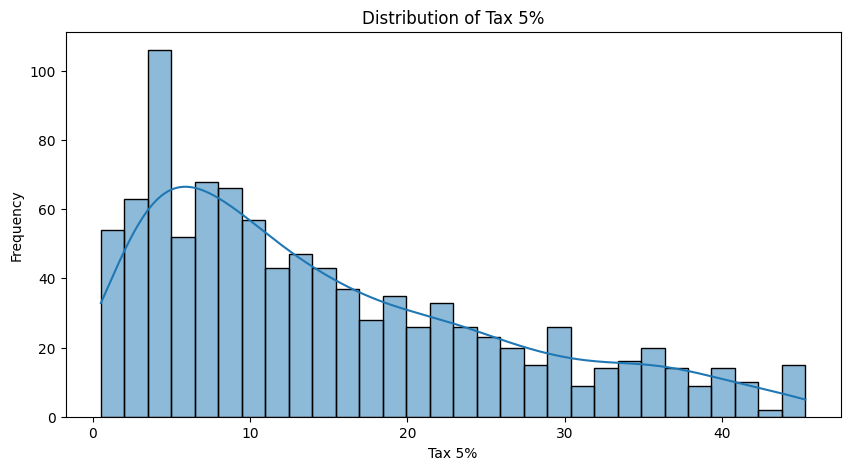

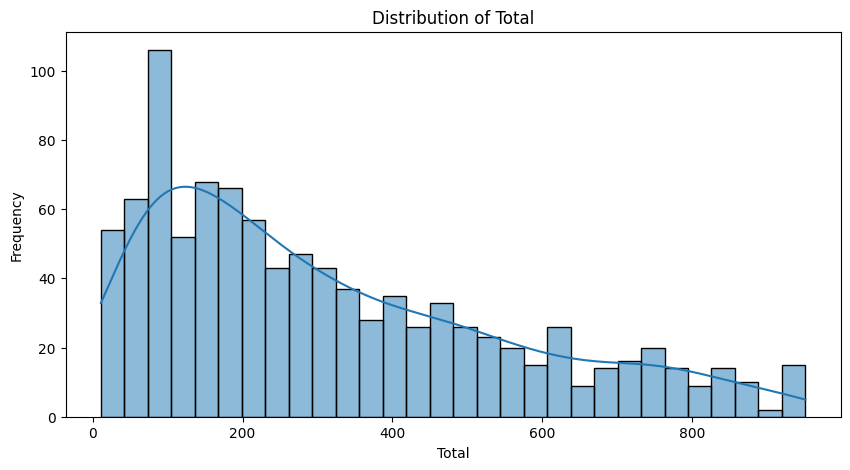

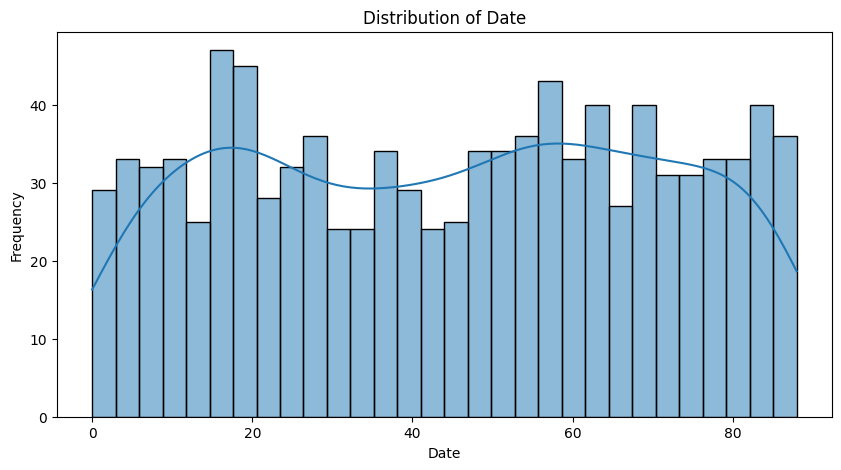

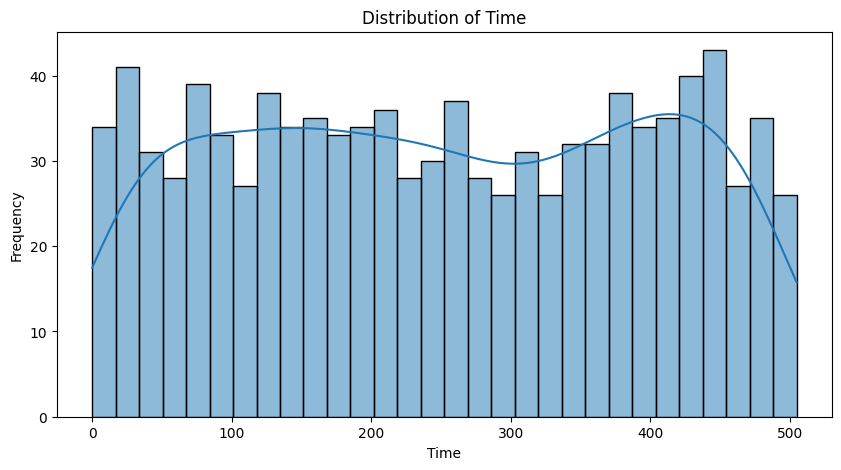

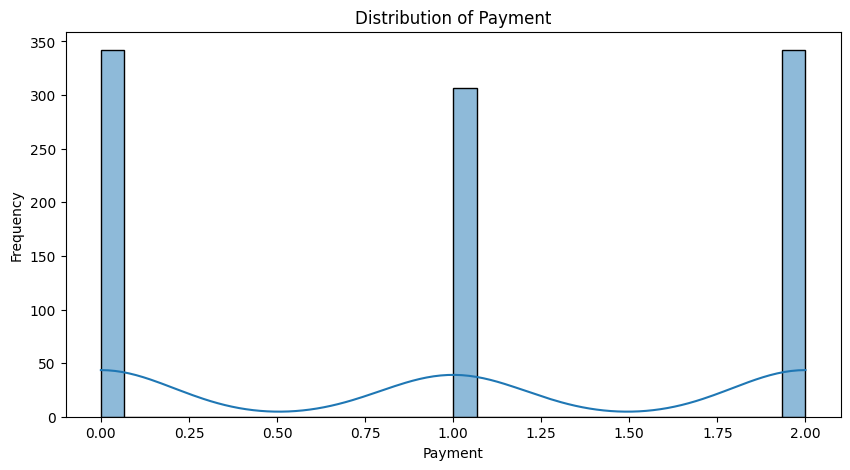

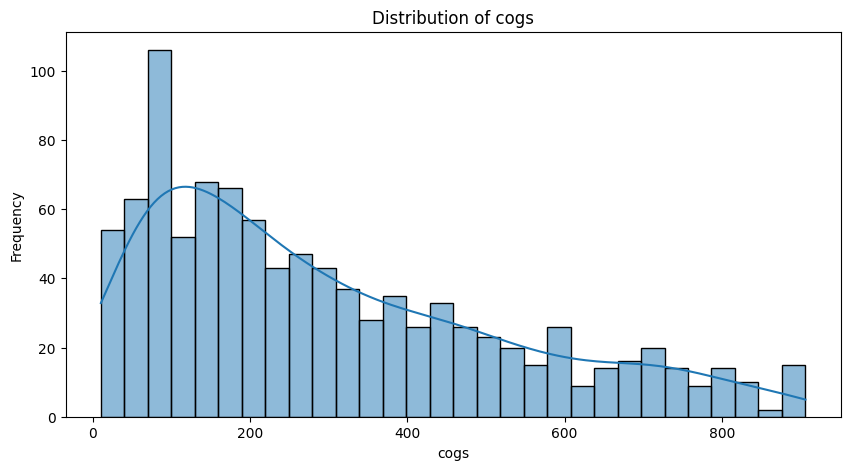

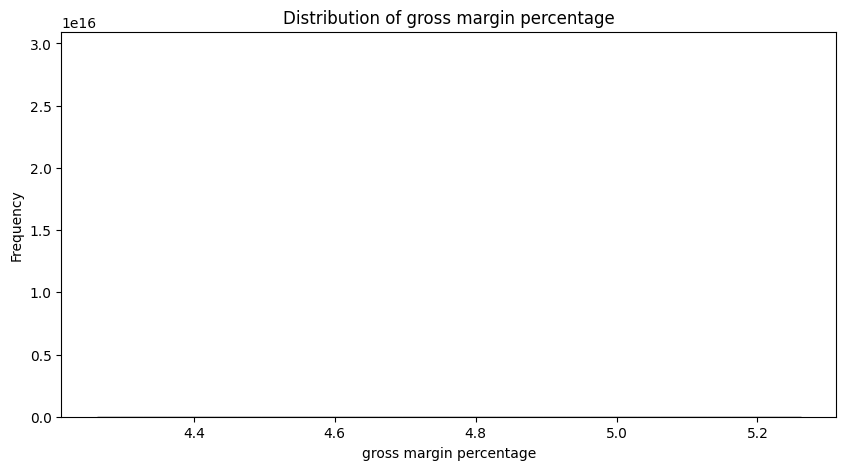

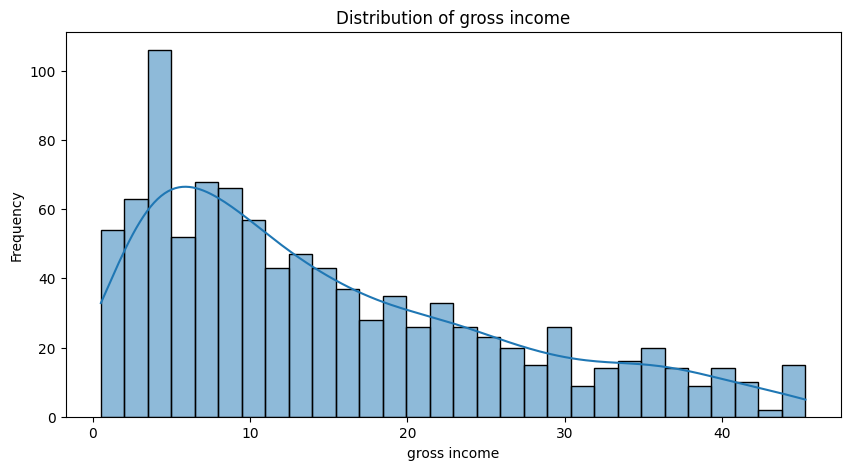

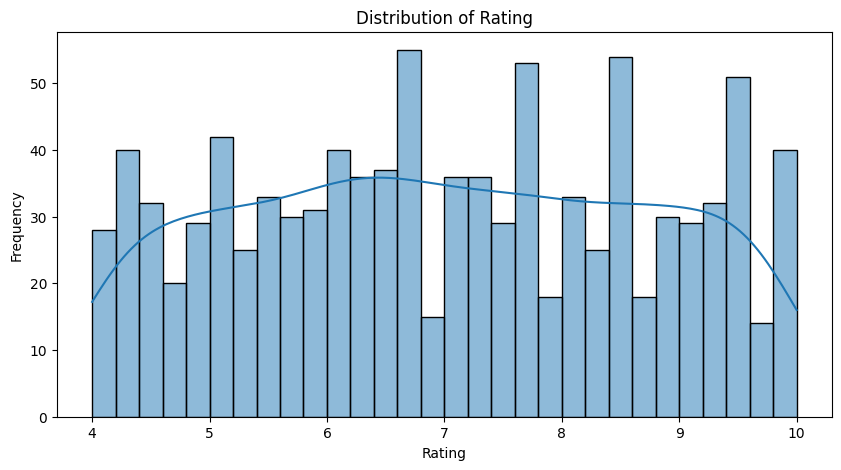

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each numeric column
for column in df1.select_dtypes(include=['float64', 'int']):
    plt.figure(figsize=(10, 5))
    sns.histplot(df1[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
df2 = df1.select_dtypes(include=[np.number])
df2.corr()

Invoice ID    Branch      City  Customer type  \
Invoice ID                 1.000000 -0.040818  0.030747       0.069717   
Branch                    -0.040818  1.000000 -0.509695      -0.018644   
City                       0.030747 -0.509695  1.000000       0.006197   
Customer type              0.069717 -0.018644  0.006197       1.000000   
Gender                     0.023019 -0.053119  0.008586       0.037342   
Product line               0.028353 -0.057181  0.012147      -0.043383   
Unit price                -0.010535  0.018688 -0.011921      -0.025249   
Quantity                   0.024423  0.006374 -0.000094      -0.021775   
Tax 5%                     0.026443  0.024253 -0.009518      -0.029361   
Total                      0.026443  0.024253 -0.009518      -0.029361   
Date                      -0.023524 -0.020069  0.000795       0.002631   
Time                       0.010127  0.036845 -0.066662      -0.019262   
Payment                    0.021303 -0.050576  0.020697       0.019434   
cogs                       0.026443  0.024253 -0.009518      -0.029361   
gross margin percentage         NaN       NaN       NaN            NaN   
gross income               0.026443  0.024253 -0.009518      -0.029361   
Rating                    -0.006661  0.014587  0.045363       0.021873   

                           Gender  Product line  Unit price  Quantity  \
Invoice ID               0.023019      0.028353   -0.010535  0.024423   
Branch                  -0.053119     -0.057181    0.018688  0.006374   
City                     0.008586      0.012147   -0.011921 -0.000094   
Customer type            0.037342     -0.043383   -0.025249 -0.021775   
Gender                   1.000000      0.005618    0.020548 -0.070712   
Product line             0.005618      1.000000    0.016208  0.016947   
Unit price               0.020548      0.016208    1.000000 -0.011506   
Quantity                -0.070712      0.016947   -0.011506  1.000000   
Tax 5%                  -0.042631      0.026449    0.623355  0.699290   
Total                   -0.042631      0.026449    0.623355  0.699290   
Date                     0.022513     -0.028804   -0.027178 -0.007291   
Time                     0.085812     -0.058109    0.007783 -0.009478   
Payment                  0.046155      0.031149   -0.018341 -0.005856   
cogs                    -0.042631      0.026449    0.623355  0.699290   
gross margin percentage       NaN           NaN         NaN       NaN   
gross income            -0.042631      0.026449    0.623355  0.699290   
Rating                   0.000071     -0.014941   -0.002527 -0.009694   

                           Tax 5%     Total      Date      Time   Payment  \
Invoice ID               0.026443  0.026443 -0.023524  0.010127  0.021303   
Branch                   0.024253  0.024253 -0.020069  0.036845 -0.050576   
City                    -0.009518 -0.009518  0.000795 -0.066662  0.020697   
Customer type           -0.029361 -0.029361  0.002631 -0.019262  0.019434   
Gender                  -0.042631 -0.042631  0.022513  0.085812  0.046155   
Product line             0.026449  0.026449 -0.028804 -0.058109  0.031149   
Unit price               0.623355  0.623355 -0.027178  0.007783 -0.018341   
Quantity                 0.699290  0.699290 -0.007291 -0.009478 -0.005856   
Tax 5%                   1.000000  1.000000 -0.013893 -0.006304 -0.016811   
Total                    1.000000  1.000000 -0.013893 -0.006304 -0.016811   
Date                    -0.013893 -0.013893  1.000000  0.030959  0.025207   
Time                    -0.006304 -0.006304  0.030959  1.000000  0.041823   
Payment                 -0.016811 -0.016811  0.025207  0.041823  1.000000   
cogs                     1.000000  1.000000 -0.013893 -0.006304 -0.016811   
gross margin percentage       NaN       NaN       NaN       NaN       NaN   
gross income             1.000000  1.000000 -0.013893 -0.006304 -0.016811   
Rating                  -0.026092 -0.026092 -0.021432 -0.024952 -0.0

In [ ]:
df2.shape

(991, 17)

In [ ]:
df2

Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
994         689       2     1              0       0             0   
995         153       2     1              1       1             3   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity   Tax 5%     Total  Date  Time  Payment    cogs  \
0         74.69         7  26.1415  548.9715    26   146        2  522.83   
1         15.28         5   3.8200   80.2200    87    23        0   76.40   
2         46.33         7  16.2155  340.5255    81   155        1  324.31   
3         58.22         8  23.2880  489.0480    19   485        2  465.76   
4         86.31         7  30.2085  634.3785    57    29        2  604.17   
..          ...       ...      ...       ...   ...   ...      ...     ...   
994       60.95         1   3.0475   63.9975    40    79        2   60.95   
995       40.35         1   2.0175   42.3675    21   174        2   40.35   
997       31.84         1   1.5920   33.4320    58   154        0   31.84   
998       65.82         1   3.2910   69.1110    45   261        0   65.82   
999       88.34         7  30.9190  649.2990    40   160        0  618.38   

     gross margin percentage  gross income  Rating  
0                   4.761905       26.1415     9.1  
1                   4.761905        3.8200     9.6  
2                   4.761905       16.2155     7.4  
3                   4.761905       23.2880     8.4  
4                   4.761905       30.2085     5.3  
..                       ...           ...     ...  
994                 4.761905        3.0475     5.9  
995                 4.761905        2.0175     6.2  
997                 4.761905        1.5920     7.7  
998                 4.761905        3.2910     4.1  
999                 4.761905       30.9190     6.6  

[991 rows x 17 columns]

In [ ]:
# Check the unique values in the Rating column
print(df['Rating'].unique())  # Check the original ratings


[ 9.1  9.6  7.4  8.4  5.3  4.1  5.8  8.   7.2  5.9  4.5  6.8  7.1  8.2
  5.7  4.6  6.9  8.6  4.4  4.8  5.1  9.9  6.   8.5  6.7  7.7  7.5  7.
  4.7  7.6  7.9  6.3  5.6  9.5  8.1  6.5  6.1  6.6  5.4  9.3 10.   6.4
  4.3  4.   8.7  9.4  5.5  8.3  7.3  4.9  4.2  9.2  7.8  5.2  9.   8.8
  6.2  9.8  9.7  5.   8.9]


In [ ]:
# Function to categorize ratings
def categorize_rating(Rating):
    if Rating <= 3:
        return 'Poor'
    elif 3 < Rating <= 5:
        return 'Good'
    elif 5 < Rating <= 7:
        return 'Very Good'
    elif 7 < Rating <= 8:
        return 'Excellent'
    elif Rating > 8:
        return 'Outstanding'

# Apply the function to create a new column
df2['Rating_category'] = df2['Rating'].apply(categorize_rating)


df2



Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
994         689       2     1              0       0             0   
995         153       2     1              1       1             3   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity   Tax 5%     Total  Date  Time  Payment    cogs  \
0         74.69         7  26.1415  548.9715    26   146        2  522.83   
1         15.28         5   3.8200   80.2200    87    23        0   76.40   
2         46.33         7  16.2155  340.5255    81   155        1  324.31   
3         58.22         8  23.2880  489.0480    19   485        2  465.76   
4         86.31         7  30.2085  634.3785    57    29        2  604.17   
..          ...       ...      ...       ...   ...   ...      ...     ...   
994       60.95         1   3.0475   63.9975    40    79        2   60.95   
995       40.35         1   2.0175   42.3675    21   174        2   40.35   
997       31.84         1   1.5920   33.4320    58   154        0   31.84   
998       65.82         1   3.2910   69.1110    45   261        0   65.82   
999       88.34         7  30.9190  649.2990    40   160        0  618.38   

     gross margin percentage  gross income  Rating Rating_category  
0                   4.761905       26.1415     9.1     Outstanding  
1                   4.761905        3.8200     9.6     Outstanding  
2                   4.761905       16.2155     7.4       Excellent  
3                   4.761905       23.2880     8.4     Outstanding  
4                   4.761905       30.2085     5.3       Very Good  
..                       ...           ...     ...             ...  
994                 4.761905        3.0475     5.9       Very Good  
995                 4.761905        2.0175     6.2       Very Good  
997                 4.761905        1.5920     7.7       Excellent  
998                 4.761905        3.2910     4.1            Good  
999                 4.761905       30.9190     6.6       Very Good  

[991 rows x 18 columns]

In [ ]:

# Ensure the Rating column is now categorical
print(df2['Rating'].unique())  # Check the categorized ratings
print(df2['Rating'].dtype)  # Confirm data type

# Define features and target variable
X = df2.drop('Rating', axis=1)  # Features
y = df2['Rating']  # Target variable

# If necessary, encode categorical variables
X = pd.get_dummies(X, drop_first=True)

df2

[ 9.1  9.6  7.4  8.4  5.3  4.1  5.8  8.   7.2  5.9  4.5  6.8  7.1  8.2
  5.7  4.6  6.9  8.6  4.4  4.8  5.1  9.9  6.   8.5  6.7  7.7  7.5  7.
  4.7  7.6  7.9  6.3  5.6  9.5  8.1  6.5  6.1  6.6  5.4  9.3 10.   6.4
  4.3  4.   8.7  9.4  5.5  8.3  7.3  4.9  4.2  9.2  7.8  5.2  9.   8.8
  6.2  9.8  9.7  5.   8.9]
float64


Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
994         689       2     1              0       0             0   
995         153       2     1              1       1             3   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity   Tax 5%     Total  Date  Time  Payment    cogs  \
0         74.69         7  26.1415  548.9715    26   146        2  522.83   
1         15.28         5   3.8200   80.2200    87    23        0   76.40   
2         46.33         7  16.2155  340.5255    81   155        1  324.31   
3         58.22         8  23.2880  489.0480    19   485        2  465.76   
4         86.31         7  30.2085  634.3785    57    29        2  604.17   
..          ...       ...      ...       ...   ...   ...      ...     ...   
994       60.95         1   3.0475   63.9975    40    79        2   60.95   
995       40.35         1   2.0175   42.3675    21   174        2   40.35   
997       31.84         1   1.5920   33.4320    58   154        0   31.84   
998       65.82         1   3.2910   69.1110    45   261        0   65.82   
999       88.34         7  30.9190  649.2990    40   160        0  618.38   

     gross margin percentage  gross income  Rating Rating_category  
0                   4.761905       26.1415     9.1     Outstanding  
1                   4.761905        3.8200     9.6     Outstanding  
2                   4.761905       16.2155     7.4       Excellent  
3                   4.761905       23.2880     8.4     Outstanding  
4                   4.761905       30.2085     5.3       Very Good  
..                       ...           ...     ...             ...  
994                 4.761905        3.0475     5.9       Very Good  
995                 4.761905        2.0175     6.2       Very Good  
997                 4.761905        1.5920     7.7       Excellent  
998                 4.761905        3.2910     4.1            Good  
999                 4.761905       30.9190     6.6       Very Good  

[991 rows x 18 columns]

In [ ]:
df2['Rating'] = df2['Rating_category']
df2.drop(columns=['Rating_category'], inplace=True)

df2

Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
994         689       2     1              0       0             0   
995         153       2     1              1       1             3   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity   Tax 5%     Total  Date  Time  Payment    cogs  \
0         74.69         7  26.1415  548.9715    26   146        2  522.83   
1         15.28         5   3.8200   80.2200    87    23        0   76.40   
2         46.33         7  16.2155  340.5255    81   155        1  324.31   
3         58.22         8  23.2880  489.0480    19   485        2  465.76   
4         86.31         7  30.2085  634.3785    57    29        2  604.17   
..          ...       ...      ...       ...   ...   ...      ...     ...   
994       60.95         1   3.0475   63.9975    40    79        2   60.95   
995       40.35         1   2.0175   42.3675    21   174        2   40.35   
997       31.84         1   1.5920   33.4320    58   154        0   31.84   
998       65.82         1   3.2910   69.1110    45   261        0   65.82   
999       88.34         7  30.9190  649.2990    40   160        0  618.38   

     gross margin percentage  gross income       Rating  
0                   4.761905       26.1415  Outstanding  
1                   4.761905        3.8200  Outstanding  
2                   4.761905       16.2155    Excellent  
3                   4.761905       23.2880  Outstanding  
4                   4.761905       30.2085    Very Good  
..                       ...           ...          ...  
994                 4.761905        3.0475    Very Good  
995                 4.761905        2.0175    Very Good  
997                 4.761905        1.5920    Excellent  
998                 4.761905        3.2910         Good  
999                 4.761905       30.9190    Very Good  

[991 rows x 17 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**EXPLORATORY DATA ANALYSIS**



**HISTOGRAM**

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

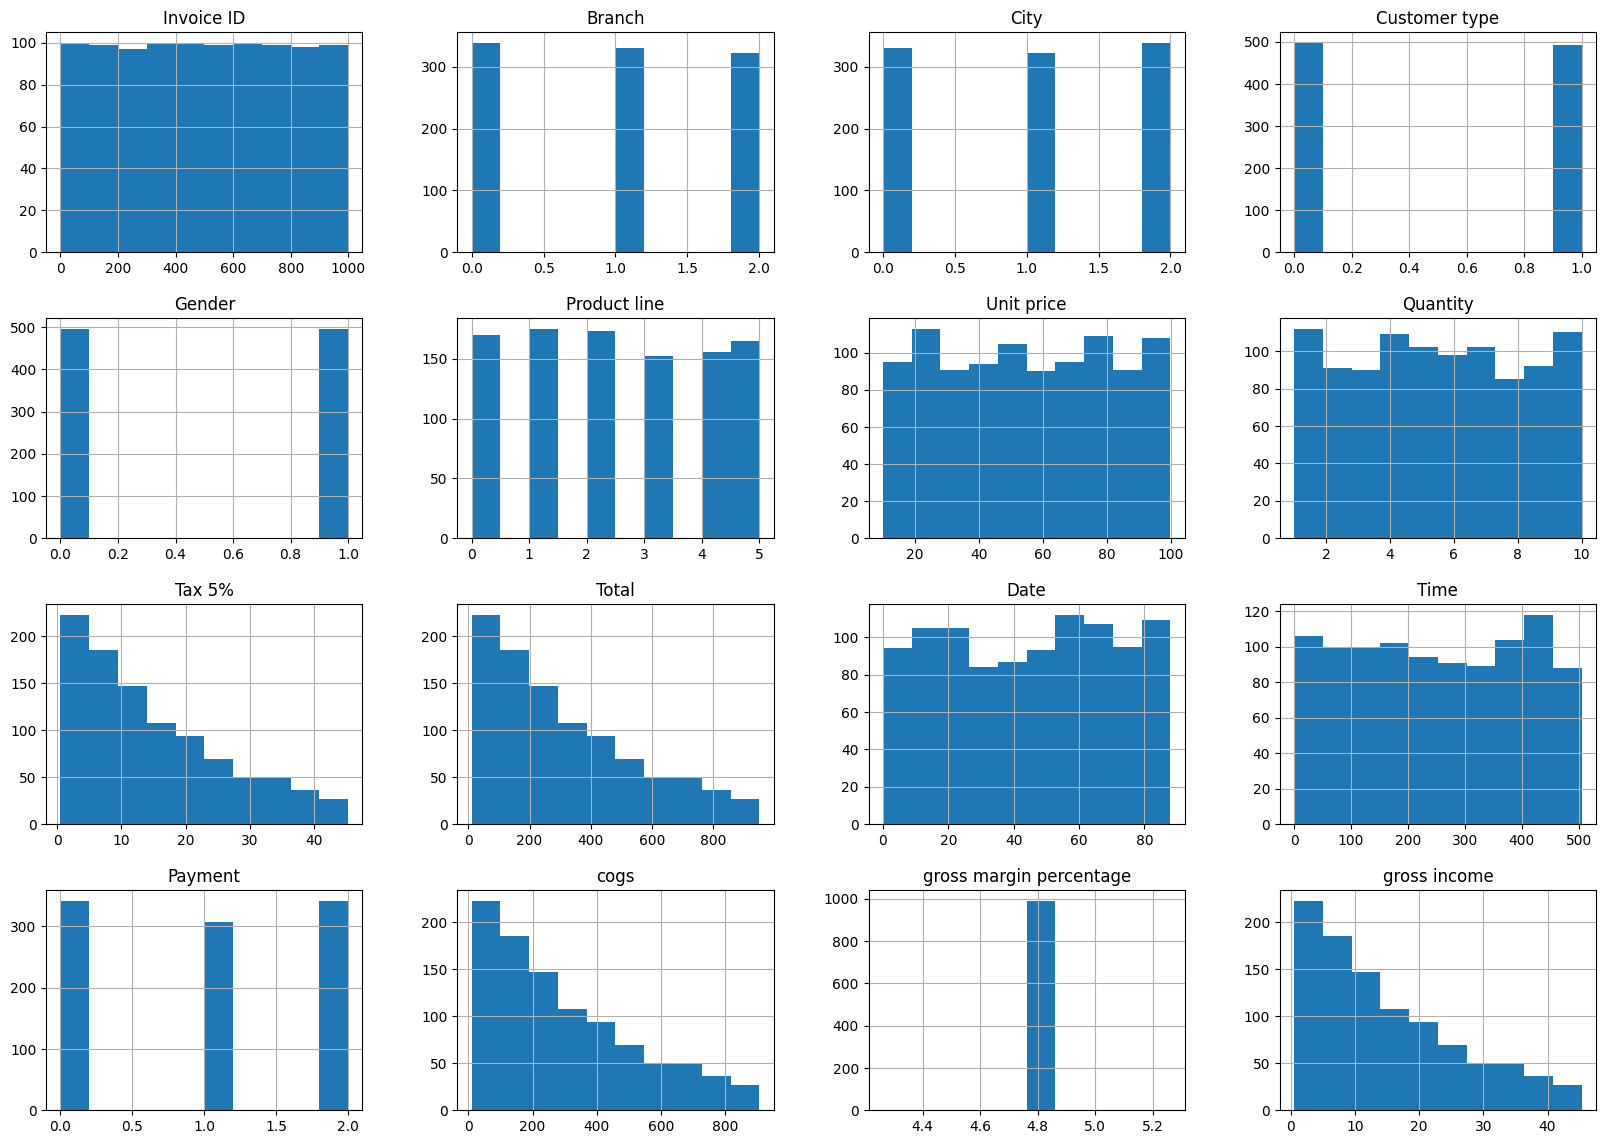

In [ ]:
df2.hist(figsize=(20,14))
plt.show()

#**HEATMAP**

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.

In [ ]:
# Select numerical features for correlation
numerical_features = df2.select_dtypes(include=['int64', 'float64'])


In [ ]:
correlation_matrix = numerical_features.corr()


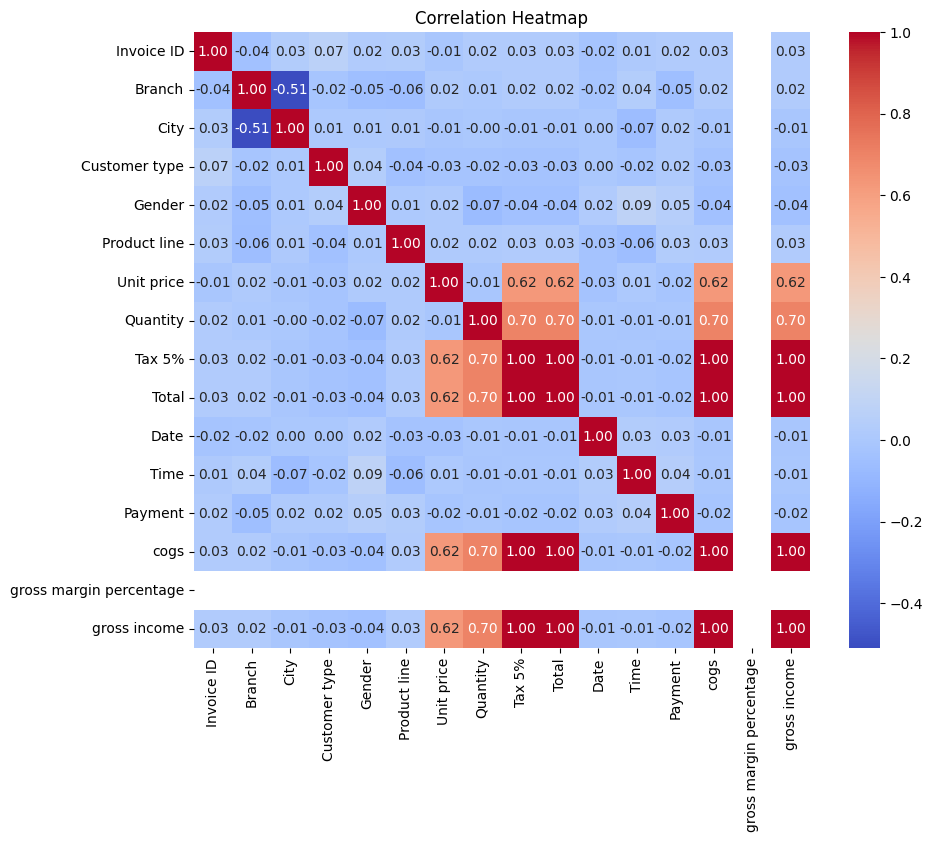

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df2.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**BOXPLOT**

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<Axes: xlabel='gross income'>

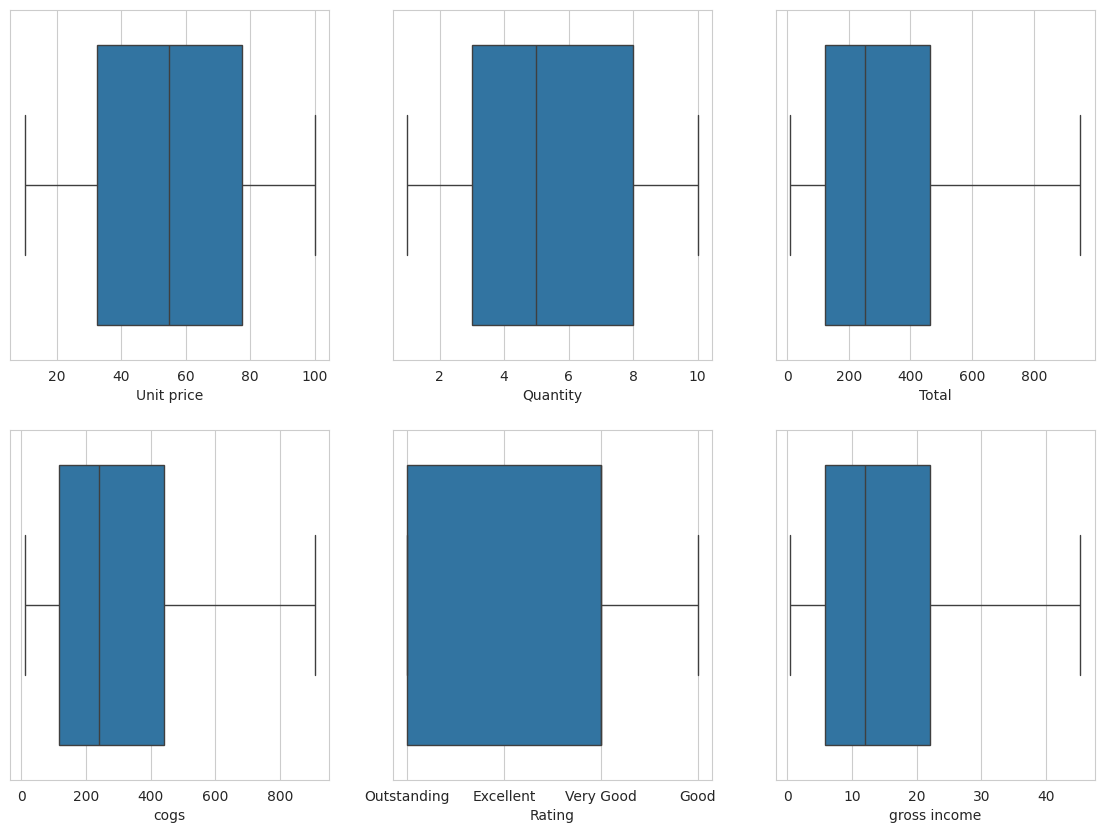

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df2)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df2)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df2)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df2)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df2)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df2)

**PAIRPLOT**

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

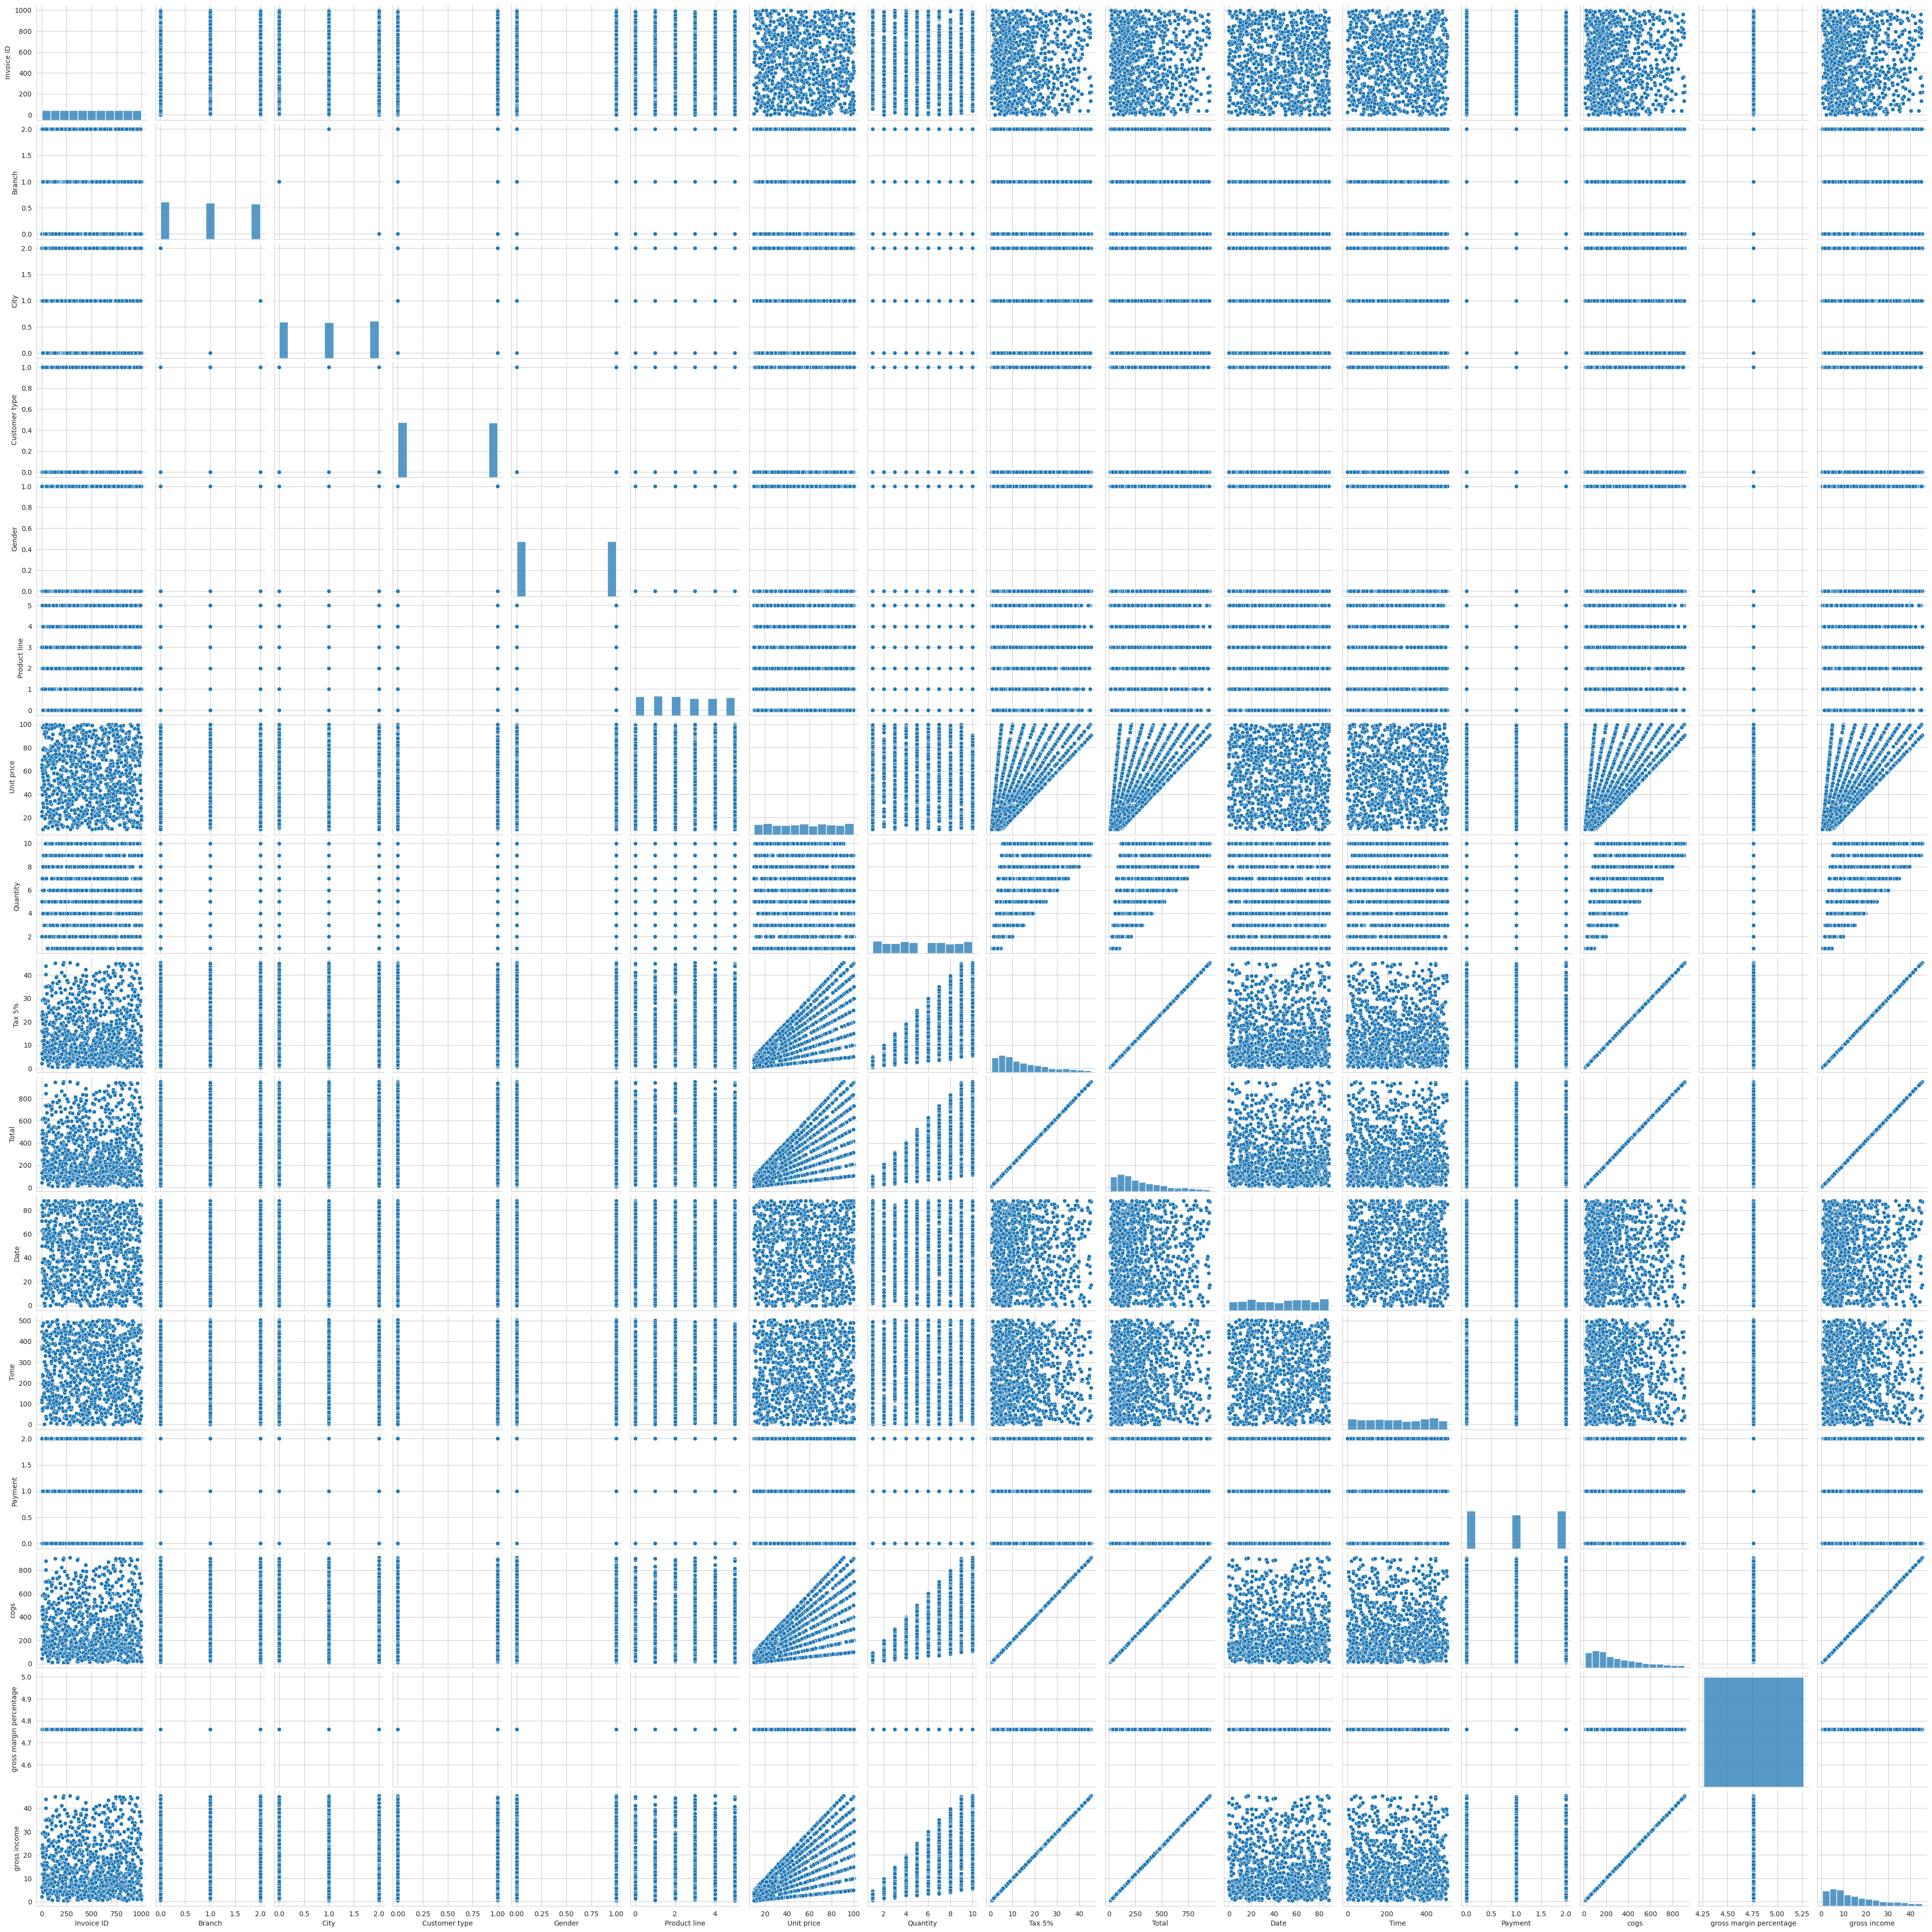

In [ ]:
sns.pairplot(data=df2)

**SCATTER PLOT**

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

<Axes: xlabel='Rating', ylabel='cogs'>

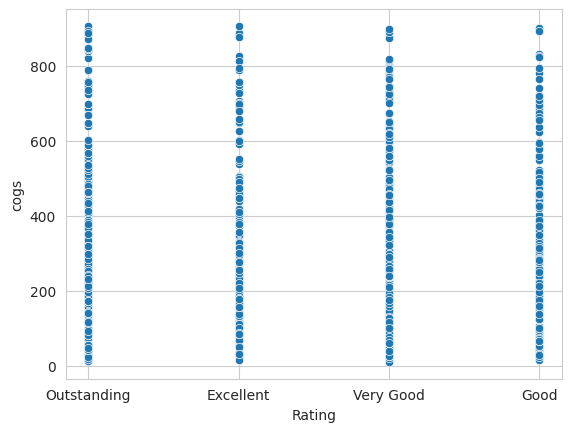

In [ ]:
sns.scatterplot(x='Rating', y= 'cogs', data=df2)

**JOINTPLOT**



Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.

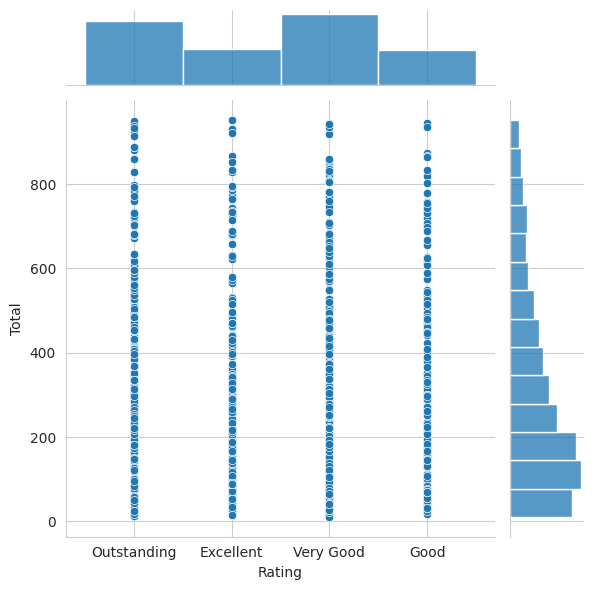

In [ ]:
sns.jointplot(x='Rating', y= 'Total', data=df2)

**KDE PLOT (DENSITY PLOT)**

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

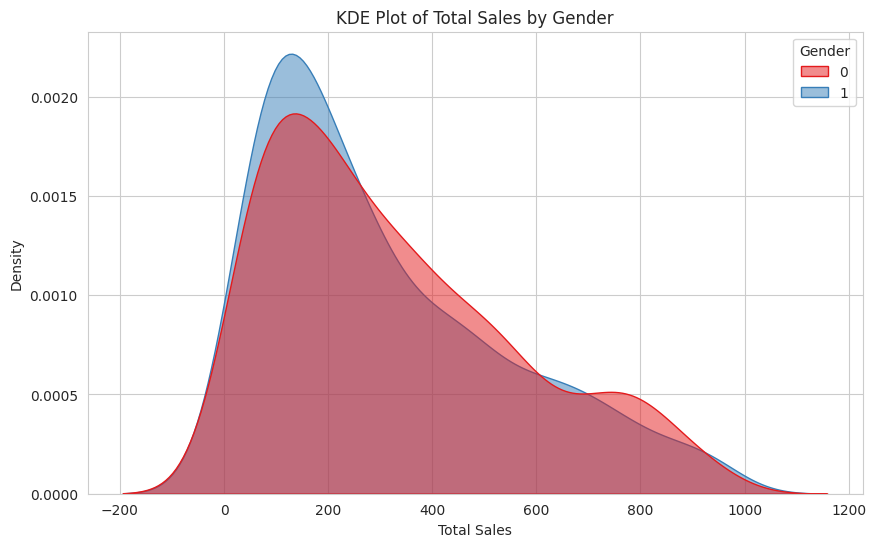

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df2, x='Total', hue='Gender', fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title('KDE Plot of Total Sales by Gender')
plt.xlabel('Total Sales')
plt.ylabel('Density')
plt.show()


**LINEPLOT**

A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

<Axes: xlabel='Rating', ylabel='Unit price'>

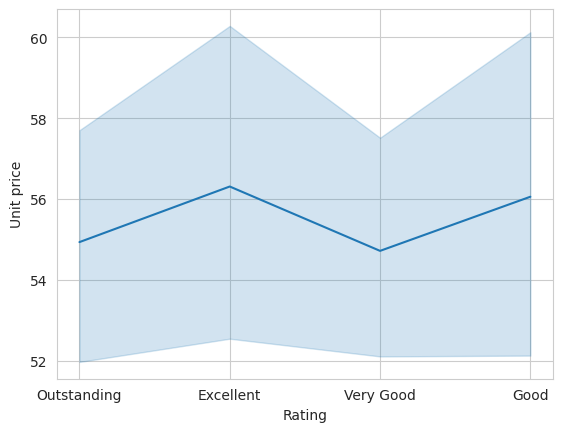

In [ ]:
sns.lineplot(x='Rating', y= 'Unit price', data=df2)

**BARPLOT**

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

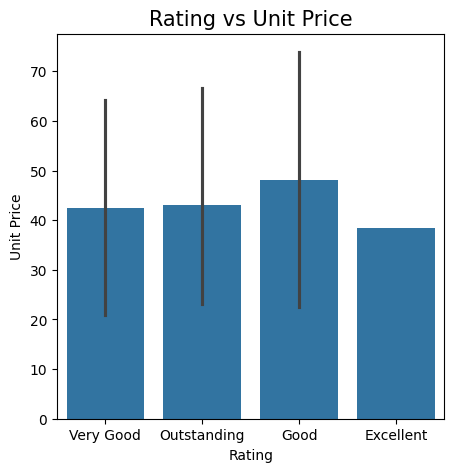

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df2[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

In [ ]:
df2.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

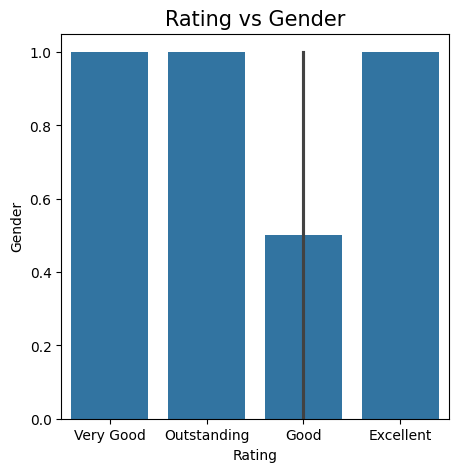

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=df2[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

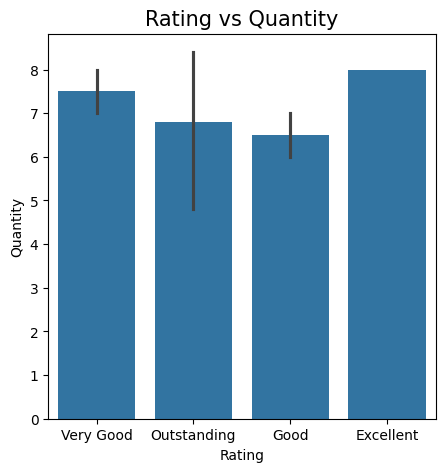

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df2[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

**TRAINING AND TESTING DATA**




In [ ]:
X = df2.drop('Rating', axis=1)  # Replace 'target_column' with your actual target column
y = df2['Rating']  # Replace with your actual target column


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

792
199
792
199


##**MODELS**

1. **KNeighborsClassifier**

By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.

In [ ]:
print(df2.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


In [ ]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
training_score = knn.score(X_train, y_train)*100
print(f'Training Score: {training_score:.2f}%')



Confusion Matrix:
 [[ 5  5 16  6]
 [ 5  7  9 10]
 [10 10 22 14]
 [12 12 33 23]]
Classification Report:
               precision    recall  f1-score   support

   Excellent       0.16      0.16      0.16        32
        Good       0.21      0.23      0.22        31
 Outstanding       0.28      0.39      0.32        56
   Very Good       0.43      0.29      0.35        80

    accuracy                           0.29       199
   macro avg       0.27      0.27      0.26       199
weighted avg       0.31      0.29      0.29       199

Training Score: 50.38%


**2. SVC**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00        32
        Good       0.00      0.00      0.00        31
 Outstanding       0.29      0.39      0.33        56
   Very Good       0.40      0.61      0.48        80

    accuracy                           0.36       199
   macro avg       0.17      0.25      0.20       199
weighted avg       0.24      0.36      0.29       199

Confusion Matrix:
 [[ 0  0 10 22]
 [ 0  0 13 18]
 [ 0  0 22 34]
 [ 0  0 31 49]]
Training Score:
 35.73232323232323


**3. Naive Bayes**

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

   Excellent       0.33      0.03      0.06        32
        Good       0.22      0.19      0.21        31
 Outstanding       0.24      0.27      0.25        56
   Very Good       0.34      0.45      0.39        80

    accuracy                           0.29       199
   macro avg       0.28      0.24      0.23       199
weighted avg       0.29      0.29      0.27       199

Confusion Matrix:
 [[ 1  4  7 20]
 [ 0  6  9 16]
 [ 0  7 15 34]
 [ 2 10 32 36]]
Training Score:
 35.47979797979798


**4.Decision Tree Classified**

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [ ]:
y_pred = dtree.predict(X_test)
training_accuracy = dtree.score(X_train, y_train) * 100


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f'Training Accuracy: {training_accuracy:.2f}%')


Confusion Matrix:
 [[ 2  3 18  9]
 [ 1  4 19  7]
 [ 1  9 31 15]
 [ 2  9 46 23]]
Classification Report:
               precision    recall  f1-score   support

   Excellent       0.33      0.06      0.11        32
        Good       0.16      0.13      0.14        31
 Outstanding       0.27      0.55      0.36        56
   Very Good       0.43      0.29      0.34        80

    accuracy                           0.30       199
   macro avg       0.30      0.26      0.24       199
weighted avg       0.33      0.30      0.28       199

Training Accuracy: 48.86%


**5.Random Forest Classifier**

A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)
feature_importances = rfc.feature_importances_
training_accuracy = rfc.score(X_train, y_train) * 100


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Feature Importances:", feature_importances)
print(f'Training Accuracy: {training_accuracy:.2f}%')

Confusion Matrix:
 [[ 4  2 17  9]
 [ 2  6 14  9]
 [ 4  6 22 24]
 [10  4 32 34]]
Classification Report:
               precision    recall  f1-score   support

   Excellent       0.20      0.12      0.15        32
        Good       0.33      0.19      0.24        31
 Outstanding       0.26      0.39      0.31        56
   Very Good       0.45      0.42      0.44        80

    accuracy                           0.33       199
   macro avg       0.31      0.28      0.29       199
weighted avg       0.34      0.33      0.33       199

Feature Importances: [0.10974992 0.02693533 0.0296386  0.02094957 0.02127249 0.0566656
 0.1093456  0.04947611 0.07620039 0.07894737 0.1077904  0.11918112
 0.03462044 0.0806119  0.         0.07861514]
Training Accuracy: 100.00%


**6. AdaBoostClassifier**

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

   Excellent       0.17      0.09      0.12        32
        Good       0.06      0.03      0.04        31
 Outstanding       0.26      0.38      0.31        56
   Very Good       0.41      0.44      0.42        80

    accuracy                           0.30       199
   macro avg       0.23      0.23      0.22       199
weighted avg       0.28      0.30      0.28       199

Confusion Matrix:
 [[ 3  4 13 12]
 [ 3  1 13 14]
 [ 4  7 21 24]
 [ 8  4 33 35]]
Training Score:
 42.42424242424242


**7. Gradient Boosting Classifier**

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

   Excellent       0.12      0.09      0.11        32
        Good       0.16      0.10      0.12        31
 Outstanding       0.29      0.34      0.31        56
   Very Good       0.40      0.45      0.43        80

    accuracy                           0.31       199
   macro avg       0.24      0.24      0.24       199
weighted avg       0.29      0.31      0.29       199

Confusion Matrix:
 [[ 3  4  9 16]
 [ 5  3  9 14]
 [ 7  7 19 23]
 [10  5 29 36]]
Training Score:
 87.75252525252525


In [ ]:
df2= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

Actual    Predicted
215  Outstanding    Very Good
333    Excellent    Very Good
506    Very Good  Outstanding
311  Outstanding    Very Good
88     Very Good    Very Good
..           ...          ...
712    Excellent  Outstanding
307         Good  Outstanding
816  Outstanding         Good
239         Good    Very Good
761         Good    Very Good

[199 rows x 2 columns]

**8. ExtraTreesClassifier**

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [ ]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

   Excellent       0.14      0.06      0.09        32
        Good       0.37      0.23      0.28        31
 Outstanding       0.22      0.32      0.26        56
   Very Good       0.37      0.39      0.38        80

    accuracy                           0.29       199
   macro avg       0.28      0.25      0.25       199
weighted avg       0.29      0.29      0.28       199

Confusion Matrix:
 [[ 2  5 14 11]
 [ 1  7 12 11]
 [ 4  4 18 30]
 [ 7  3 39 31]]
Training Score:
 100.0


**9.Bagging Classifier**

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. ... The base estimator to fit on random subsets of the dataset.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.27638190954773867

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

Actual    Predicted
215  Outstanding    Very Good
333    Excellent  Outstanding
506    Very Good  Outstanding
311  Outstanding    Very Good
88     Very Good    Very Good
..           ...          ...
712    Excellent    Excellent
307         Good    Very Good
816  Outstanding  Outstanding
239         Good    Very Good
761         Good    Very Good

[199 rows x 2 columns]

**ACCURACIES OF DIFFERENT MODELS ARE:**

KNeighbors Classifier= 50.38 %

SVC= 35.73 %

Naiye Bayes= 35.47 %

Decision Tree Classifier= 48.86 %

Random Forest Classifier= 100 %

Ada Boost Classifier= 42.42 %

Gradient Boosting Classifier= 87.75 %

Extra Trees Classifier= 100 %

Bagging Classifier = 23 %

We got a good accuracy of about 100 % using Random Forest Classifier and Extra Trees Classifier which is quite well for the given dataset.

The accuracy of other models can be increased further by HyperTuning

#**OVERFITTING**


**1. Control the Learning Rate**
                                                                
                                                                 
                                                                  
                                                                   
                                                                    
                                                                     
Learning Rate: Lowering the learning rate slows down the training process but can lead to better generalization. A smaller learning rate often requires a higher number of trees (estimators) to converge.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)  # Lower learning rate


**2. Limit the Number of Estimators**
                                                           
                                                            
n_estimators: Reducing the number of boosting iterations (trees) can help prevent overfitting. Monitor validation performance and find the right balance.

In [ ]:
model = GradientBoostingClassifier(n_estimators=100)  # Fewer trees



**3. Set Maximum Depth of Treesmax_depth:**  

Limiting the depth of individual trees helps control complexity and reduces the likelihood of overfitting.

In [ ]:
model = GradientBoostingClassifier(max_depth=3)  # Shallower trees


**4. Control Minimum Samples per Leaf min_samples_leaf:**

This parameter specifies the minimum number of samples required to be at a leaf node. Increasing this value can prevent the model from learning overly specific patterns.

In [ ]:
model = GradientBoostingClassifier(min_samples_leaf=5)  # Require more samples per leaf


**5. Subsample the Datasubsample:**                             

Setting this parameter to a value less than 1.0 (e.g., 0.8) means using only a subset of the training data for each tree, which helps to introduce randomness and can improve generalization.

In [ ]:
model = GradientBoostingClassifier(subsample=0.8)  # Use 80% of data for each tree


**6. Use Cross-Validation**

Employ k-fold cross-validation to assess the model's performance more reliably and find the right combination of hyperparameters.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


Cross-Validation Scores: [0.28140704 0.33838384 0.28282828 0.32323232 0.2979798 ]


**7. Early Stopping**

Monitor the validation score during training and stop when the score begins to degrade. This can be achieved with the n_iter_no_change parameter in libraries like scikit-learn.

In [ ]:
model = GradientBoostingClassifier(n_estimators=200, n_iter_no_change=10, validation_fraction=0.1)


**8. Hyperparameter Tuning**

Use techniques like Grid Search or Random Search to find the optimal hyperparameters for your model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


By controlling the complexity of the Gradient Boosting Classifier through these strategies, you can mitigate overfitting and improve the model's generalization to unseen data. Experimenting with different hyperparameters while monitoring validation performance will help you find the best configuration for your specific dataset. If you have more questions or need further details, feel free to ask!

**Regularization techniques and check their effect.**

Regularization techniques are methods used in machine learning to prevent overfitting, which occurs when a model learns the noise in the training data instead of the underlying pattern. Overfitting can lead to poor generalization on unseen data. Regularization introduces additional information (or constraints) to the model, helping it to generalize better

In [ ]:
pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Baseline model
baseline_model = GradientBoostingClassifier(n_estimators=100)
baseline_model.fit(X_train, y_train)

# Predictions and evaluation
baseline_preds = baseline_model.predict(X_test)
print("Baseline Model Accuracy:", accuracy_score(y_test, baseline_preds))


Baseline Model Accuracy: 0.3015075376884422


In [ ]:

# Regularized model
regularized_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,  # Lower learning rate
    max_depth=3,         # Shallower trees
    min_samples_leaf=5,  # More samples per leaf
    subsample=0.8        # Use 80% of the data for each tree
)
regularized_model.fit(X_train, y_train)

# Predictions and evaluation
regularized_preds = regularized_model.predict(X_test)
print("Regularized Model Accuracy:", accuracy_score(y_test, regularized_preds))


Regularized Model Accuracy: 0.27638190954773867


In [ ]:
# Classification report for detailed evaluation
print("Baseline Model Classification Report:")
print(classification_report(y_test, baseline_preds))

print("Regularized Model Classification Report:")
print(classification_report(y_test, regularized_preds))


Baseline Model Classification Report:
              precision    recall  f1-score   support

   Excellent       0.09      0.06      0.07        32
        Good       0.16      0.10      0.12        31
 Outstanding       0.28      0.34      0.31        56
   Very Good       0.40      0.45      0.43        80

    accuracy                           0.30       199
   macro avg       0.23      0.24      0.23       199
weighted avg       0.28      0.30      0.29       199

Regularized Model Classification Report:
              precision    recall  f1-score   support

   Excellent       0.09      0.03      0.05        32
        Good       0.20      0.10      0.13        31
 Outstanding       0.24      0.34      0.28        56
   Very Good       0.34      0.40      0.37        80

    accuracy                           0.28       199
   macro avg       0.22      0.22      0.21       199
weighted avg       0.25      0.28      0.25       199



**Model Deployment**

To export the model for future use or create a simple function to make predictions.

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'sales_prediction_model.pkl')

# Load the model
loaded_model = joblib.load('sales_prediction_model.pkl')


##**CONCLUSION :**




This project aims to provide actionable insights into supermarket sales, enhancing decision-making through data-driven predictions. By leveraging Python's powerful libraries for data analysis and machine learning, the project can significantly improve operational efficiency and customer satisfaction.

**Future Work**
Suggest potential areas for further analysis or predictive modeling, like forecasting future sales based on historical data.

##**THANK YOU**